In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

csv_path_county = "../data/County_Coordinates.csv"
county_df = pd.read_csv(csv_path_county, delimiter=",")
county_df.head()

county state  population        lat         lon   lat_gmap  \
0  Abbeville County    sc       16713  34.301500  -82.426750  34.189122   
1     Acadia Parish    la       44719  30.249556  -92.393000  30.229735   
2   Accomack County    va       33115  37.784250  -75.649750  37.706332   
3        Ada County    id      417501  43.607966 -116.273847  43.478767   
4      Adair County    ia        4561  41.280000  -94.485500  41.274173   

     lon_gmap  
0  -82.475276  
1  -92.381362  
2  -75.806908  
3 -116.242030  
4  -94.479976

In [52]:
csv_path_clean = "../data/Cleaned_Data.csv"
solar_clean_df = pd.read_csv(csv_path_clean, delimiter=",", encoding="ANSI")
solar_clean_df.head()

Unnamed: 0  tile_count  solar_system_count  total_panel_area         fips  \
0           0           0                   0          0.000000  27145011200   
1           2           3                   3         64.505776  27145011302   
2           3           0                   0          0.000000  27145011304   
3           4           5                   5        164.583303  27145011400   
4           5           0                   0          0.000000  27145011500   

   average_household_income          county  education_bachelor  \
0               70352.78987  Stearns County                 569   
1               71496.88658  Stearns County                 854   
2               86840.15275  Stearns County                 640   
3               89135.31560  Stearns County                 654   
4               62225.90361  Stearns County                 522   

   education_college  education_doctoral             ...               \
0               1690                  13             ...                
1               1459                  31             ...                
2               1116                  68             ...                
3               1314                  15             ...                
4               1395                  24             ...                

   incentive_count_nonresidential  incentive_residential_state_level  \
0                              39                                 11   
1                              39                                 11   
2                              39                                 11   
3                              39                                 11   
4                              39                                 11   

   incentive_nonresidential_state_level  net_metering  feedin_tariff  \
0                                    13            34              0   
1                                    13            34              0   
2                                    13            34              0   
3                                    13            34              0   
4                                    13            34              0   

   cooperate_tax  property_tax  sales_tax  rebate  avg_electricity_retail_rate  
0              0            25         12       0                         9.46  
1              0            25         12       0                         9.46  
2              0            25         12       0                         9.46  
3              0            25         12       0                         9.46  
4              0            25         12       0                         9.46  

[5 rows x 167 columns]

In [53]:
#new groupby object 

grouped_location = solar_clean_df.groupby(["county", "state"])

#create empty dataframe for sorted county and state data

location_df = pd.DataFrame()

#pull in dependent variable data
location_df["tile_count"]=grouped_location["tile_count"].sum()
location_df["solar_system_count"]=grouped_location["solar_system_count"].sum()
location_df["total_panel_area"]=grouped_location["total_panel_area"].sum()

#pull in independent variables on welfare
location_df["average_household_income"]=grouped_location["average_household_income"].mean()
location_df["per_capita_income"]=grouped_location["per_capita_income"].mean()
location_df["median_household_income"]=grouped_location["median_household_income"].mean()

#pull in independent variables on weather conditions
location_df["daily_solar_radiation"]=grouped_location["daily_solar_radiation"].mean()


#reset index on location_df to ensure county names appear in each row
location_df=location_df.reset_index()
location_df.head()


county state  tile_count  solar_system_count  total_panel_area  \
0  Abbeville County    sc           3                   3         55.207033   
1     Acadia Parish    la          56                  46       2312.784175   
2   Accomack County    va           8                   8        271.344537   
3        Ada County    id         671                 540      19231.515912   
4      Adair County    ia           5                   5        568.099858   

   average_household_income  per_capita_income  median_household_income  \
0              49827.263185       19624.750000             37707.250000   
1              55133.844332       20804.666667             40660.888889   
2              53233.733231       23293.375000             39467.000000   
3              75139.163020       29962.338983             59137.406780   
4              60362.136765       27300.000000             47743.000000   

   daily_solar_radiation  
0                   4.31  
1                   4.36  
2                   4.37  
3                   4.45  
4                   3.94

In [42]:
#merge dataframes by county and state together
new_df=pd.merge(county_df, location_df, how="left", on=["county", "state"])
new_df.head()

county state  population        lat         lon   lat_gmap  \
0  Abbeville County    sc       16713  34.301500  -82.426750  34.189122   
1     Acadia Parish    la       44719  30.249556  -92.393000  30.229735   
2   Accomack County    va       33115  37.784250  -75.649750  37.706332   
3        Ada County    id      417501  43.607966 -116.273847  43.478767   
4      Adair County    ia        4561  41.280000  -94.485500  41.274173   

     lon_gmap  tile_count  solar_system_count  total_panel_area  \
0  -82.475276         NaN                 NaN               NaN   
1  -92.381362         NaN                 NaN               NaN   
2  -75.806908         8.0                 8.0        271.344537   
3 -116.242030       671.0               540.0      19231.515912   
4  -94.479976         NaN                 NaN               NaN   

   average_household_income  per_capita_income  median_household_income  \
0                       NaN                NaN                      NaN   
1                       NaN                NaN                      NaN   
2              53233.733231       23293.375000              39467.00000   
3              75139.163020       29962.338983              59137.40678   
4                       NaN                NaN                      NaN   

   daily_solar_radiation  
0                    NaN  
1                    NaN  
2                   4.37  
3                   4.45  
4                    NaN

In [57]:
#drop all NA values from remaining data set
new_df = new_df.dropna(how='any')

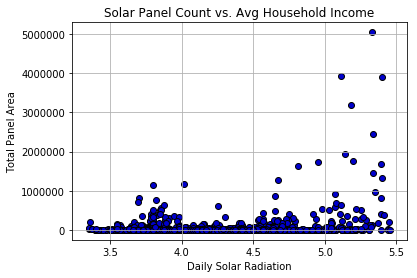

In [58]:
plt.scatter(new_df["daily_solar_radiation"], new_df["total_panel_area"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Daily Solar Radiation")
plt.ylabel("Total Panel Area")

plt.title(F"Solar Panel Count vs. Avg Household Income")

plt.show()


In [59]:
# store the figure in a variable so we can continue to add layers to the same map
fig = gmaps.figure()
coordinates=new_df[['lat_gmap', 'lon_gmap']]
solar_density = new_df["daily_solar_radiation"]

# Create a marker layer using our coordinates
heat_layer = gmaps.heatmap_layer(coordinates, weights=solar_density)

# Add the layer to the map
fig.add_layer(heat_layer)
# display the figure with the newly added layer
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
new_df.to_csv("../data/Solar_Data.csv", index=False, header=True)